In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings

In [5]:
%matplotlib inline
init_notebook_mode(connected=True)
plt.rcParams['figure.figsize'] = (12, 9)

warnings.filterwarnings('ignore')

In [6]:
CO2_Concentration = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/CO2_Concentration_forecasted.csv',parse_dates = ['Date'],index_col=['Date','State'])
Temperature_Data = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/GSOD_All_Data_no_outliers.csv',parse_dates = ['Date'],index_col=['Date','State'])
Fuel_Consumption = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/Fuel_Consumption.csv',parse_dates = ['Date'],index_col=['Date','State'])
Land_Use = pd.read_csv('https://raw.githubusercontent.com/chaitu038/ClimateChangeProject1/master/Data-Folder/Land_Use_Data.csv',parse_dates = ['Date'],index_col=['Date','State'])

Climate_Data1 = pd.merge(CO2_Concentration, Temperature_Data, how='right', left_index=True, right_index=True)
Climate_Data2 = pd.merge(Fuel_Consumption, Land_Use, how='outer', left_index=True, right_index=True)
Climate_Data = pd.merge(Climate_Data1, Climate_Data2, how='left', left_index=True, right_index=True)

### States with CO2 information - 'AK', 'CA', 'CO', 'FL', 'HI', 'OK', 'OR', 'UT', 'VI', 'WA', 'WI'

In [8]:
CO2_States_List = ['AK', 'CA', 'CO', 'FL', 'HI', 'OK', 'OR', 'UT', 'VI', 'WA', 'WI']

In [9]:
Climate_Data_State = Climate_Data.loc[Climate_Data.index.get_level_values('State')=='WA',:]
Climate_Data_State = Climate_Data_State.reset_index().set_index('Date')

In [10]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()] = Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min():Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.max()].interpolate() 

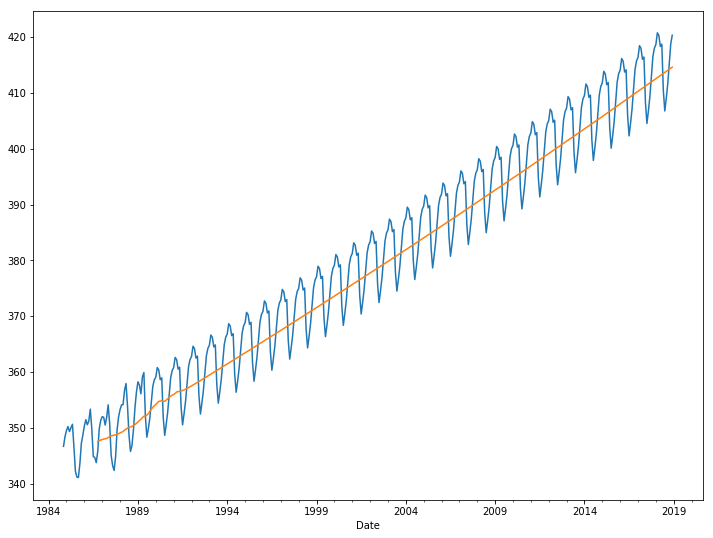

In [11]:
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()

In [12]:
Climate_Data_State.CO2_Concentration[Climate_Data_State.CO2_Concentration.notna()].index.min()

Timestamp('1984-11-30 00:00:00')

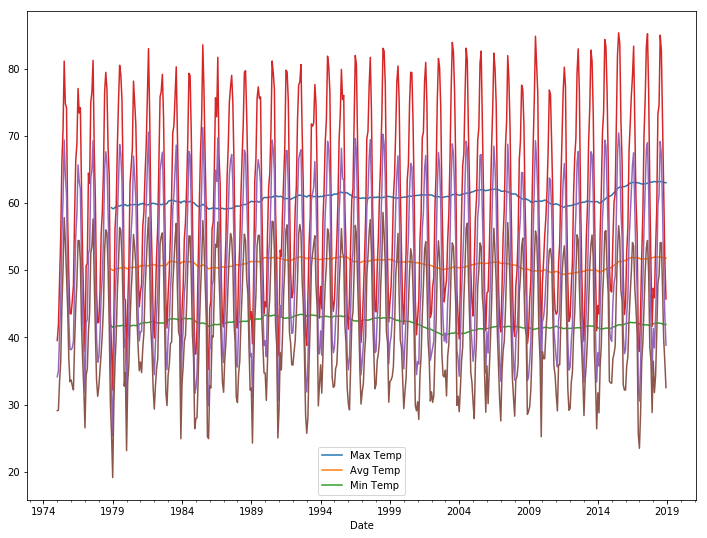

In [13]:
Climate_Data_State.TempMAX.rolling(48).mean().plot()
Climate_Data_State.TempAVG.rolling(48).mean().plot()
Climate_Data_State.TempMIN.rolling(48).mean().plot()
Climate_Data_State.TempMAX.plot()
Climate_Data_State.TempAVG.plot()
Climate_Data_State.TempMIN.plot()
plt.legend(['Max Temp','Avg Temp','Min Temp'],loc='bottom right')
plt.show()

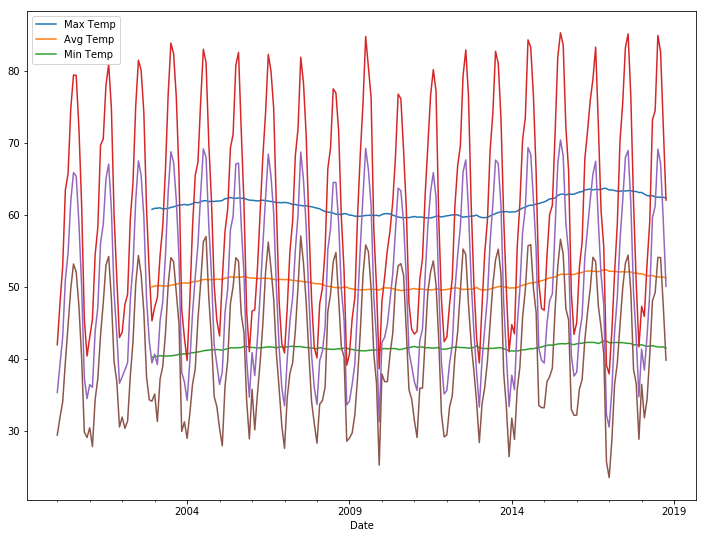

In [14]:
Climate_Data_State.TempMAX['2000-01-01':'2018-10-31'].rolling(36).mean().plot()
Climate_Data_State.TempAVG['2000-01-01':'2018-10-31'].rolling(36).mean().plot()
Climate_Data_State.TempMIN['2000-01-01':'2018-10-31'].rolling(36).mean().plot()
Climate_Data_State.TempMAX['2000-01-01':'2018-10-31'].plot()
Climate_Data_State.TempAVG['2000-01-01':'2018-10-31'].plot()
Climate_Data_State.TempMIN['2000-01-01':'2018-10-31'].plot()
plt.legend(['Max Temp','Avg Temp','Min Temp'],loc='bottom right')
plt.show()

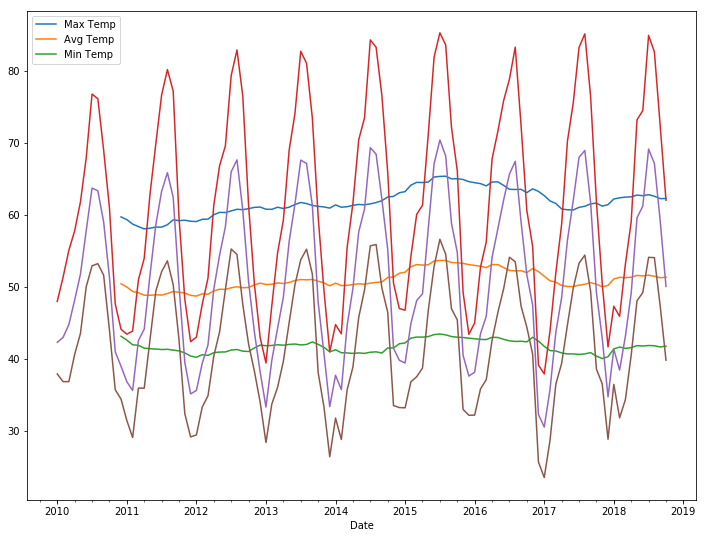

In [15]:
Climate_Data_State.TempMAX['2010-01-01':'2018-10-31'].rolling(12).mean().plot()
Climate_Data_State.TempAVG['2010-01-01':'2018-10-31'].rolling(12).mean().plot()
Climate_Data_State.TempMIN['2010-01-01':'2018-10-31'].rolling(12).mean().plot()
Climate_Data_State.TempMAX['2010-01-01':'2018-10-31'].plot()
Climate_Data_State.TempAVG['2010-01-01':'2018-10-31'].plot()
Climate_Data_State.TempMIN['2010-01-01':'2018-10-31'].plot()
plt.legend(['Max Temp','Avg Temp','Min Temp'],loc='bottom right')
plt.show()

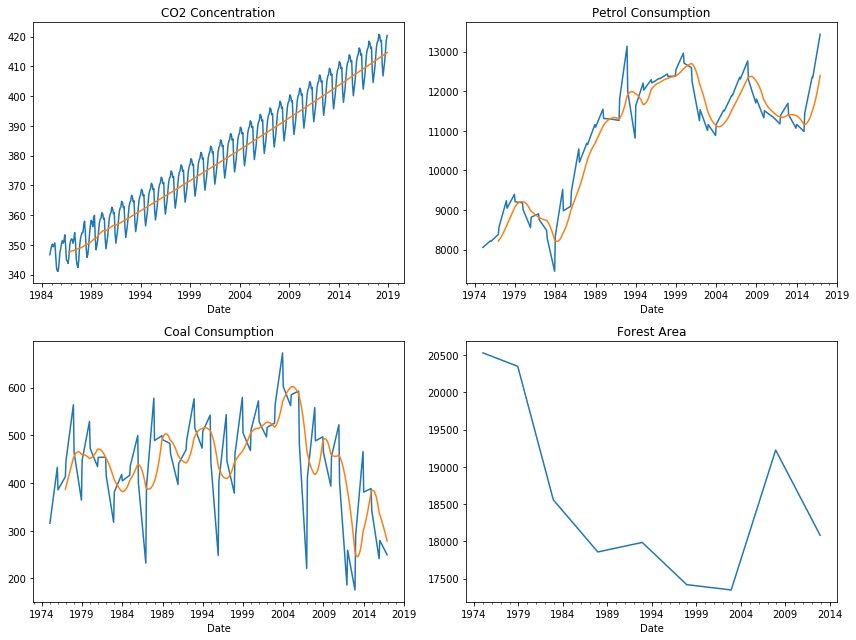

In [16]:
plt.subplot(2,2,1)
Climate_Data_State.CO2_Concentration.plot()
Climate_Data_State.CO2_Concentration.rolling(24).mean().plot()
plt.title('CO2 Concentration')
plt.subplot(2,2,2)
Climate_Data_State.Petrol_Consumption.plot()
Climate_Data_State.Petrol_Consumption.rolling(24).mean().plot()
plt.title('Petrol Consumption')
plt.subplot(2,2,3)
Climate_Data_State.Coal_Consumption.plot()
Climate_Data_State.Coal_Consumption.rolling(24).mean().plot()
plt.title('Coal Consumption')
plt.subplot(2,2,4)
Climate_Data_State.Forest_Area.plot()
plt.title('Forest Area')
plt.tight_layout()

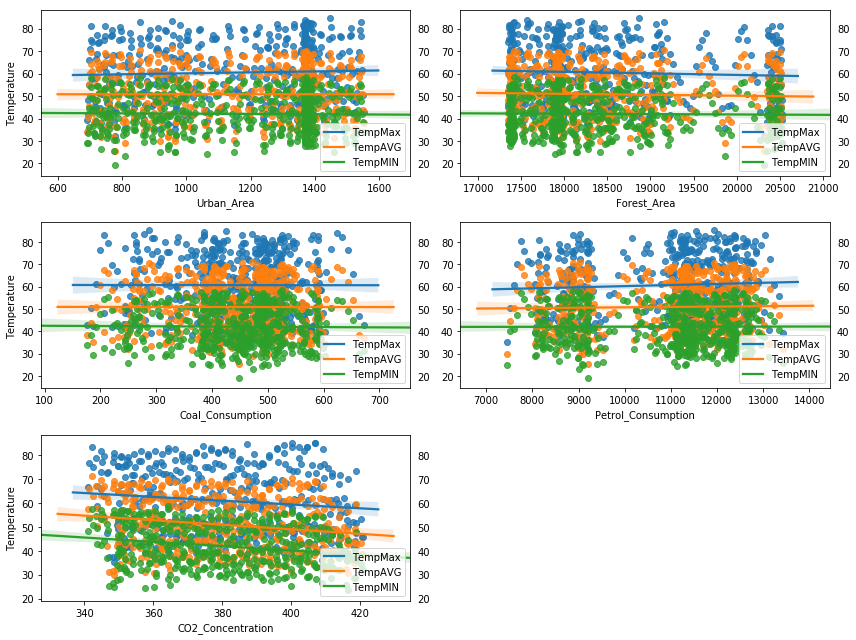

In [17]:
plt.subplot(3,2,1)
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Urban_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,2)
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Forest_Area',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,3)
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Coal_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.subplot(3,2,4)
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='Petrol_Consumption',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel(None)
plt.subplot(3,2,5)
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMAX')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempAVG')
sns.regplot(data=Climate_Data_State,x='CO2_Concentration',y='TempMIN')
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.legend(['TempMax','TempAVG','TempMIN'],loc='lower right')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

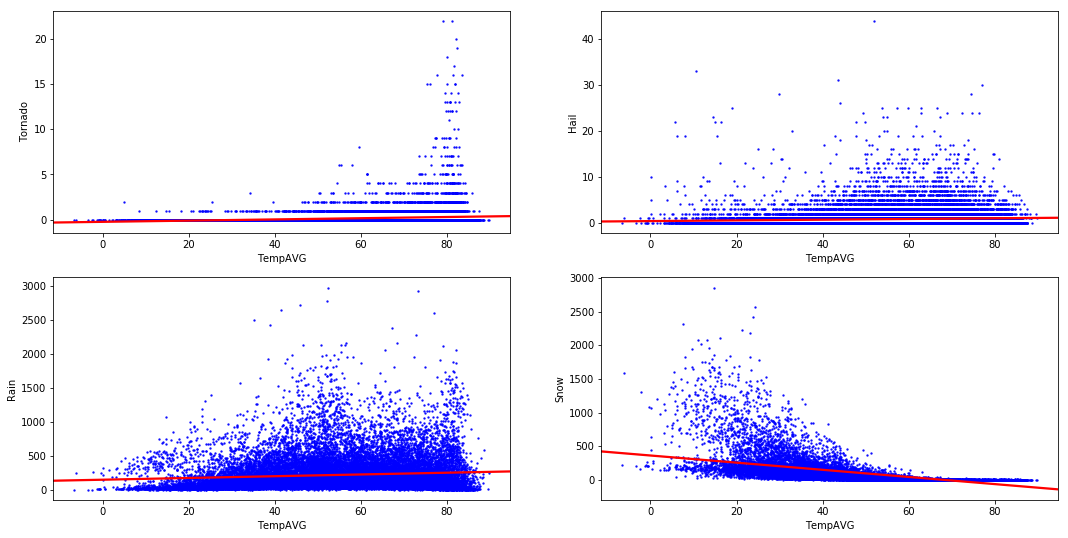

In [38]:
plt.subplot(2,2,1)
sns.regplot(data=Climate_Data,y='Tornado',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,2)
sns.regplot(data=Climate_Data,y='Hail',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,3)
sns.regplot(data=Climate_Data,y='Rain',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.subplot(2,2,4)
sns.regplot(data=Climate_Data,y='Snow',x='TempAVG',scatter_kws={'color':'blue','s':2},line_kws={'color':'red'})
plt.show()

In [39]:
traceTempMaxDate = go.Bar(x=Climate_Data_State.index, y=Climate_Data_State['TempMAX'],name='Max Temperature over Time')
layoutTempMaxDate = go.Layout(title='Max Temperature over Time',showlegend=True)
figTempMaxDate = go.Figure(data=[traceTempMaxDate],layout=layoutTempMaxDate)
iplot(figTempMaxDate)

In [20]:
traceTempMaxCO2 = go.Bar(x=Climate_Data_State['CO2_Concentration'], y=Climate_Data_State['TempMAX'],name='Max Temperature vs CO2')
layoutTempMaxCO2 = go.Layout(title='Max Temperature vs CO2',showlegend=True)
figTempMaxCO2 = go.Figure(data=[traceTempMaxCO2],layout=layoutTempMaxCO2)
iplot(figTempMaxCO2)

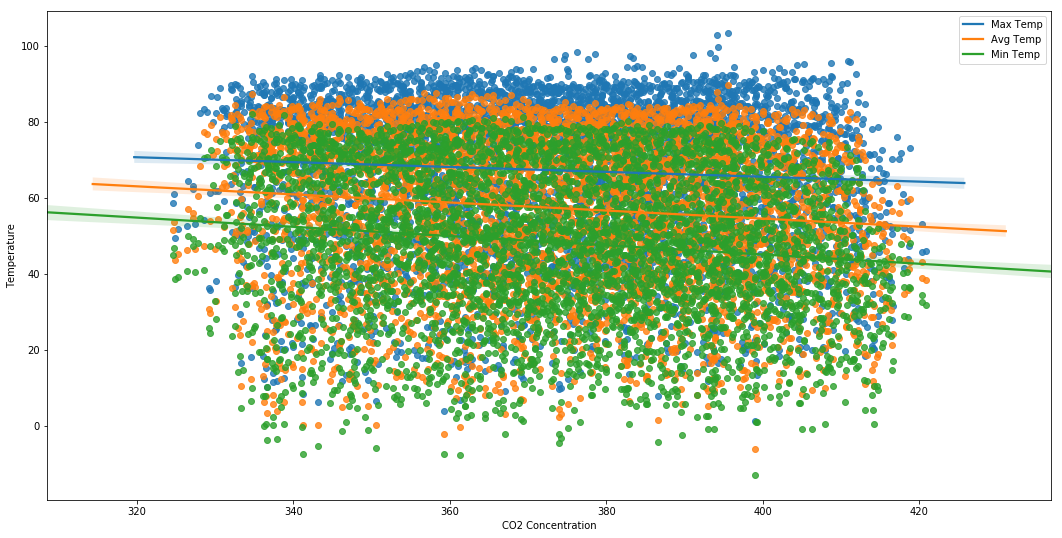

In [29]:
sns.regplot(x='CO2_Concentration',y='TempMAX',data=Climate_Data.loc[Climate_Data.index.get_level_values('State').isin(CO2_States_List)])
sns.regplot(x='CO2_Concentration',y='TempAVG',data=Climate_Data.loc[Climate_Data.index.get_level_values('State').isin(CO2_States_List)])
sns.regplot(x='CO2_Concentration',y='TempMIN',data=Climate_Data.loc[Climate_Data.index.get_level_values('State').isin(CO2_States_List)])
plt.xlabel('CO2 Concentration')
plt.ylabel('Temperature')
plt.legend(['Max Temp','Avg Temp','Min Temp'])
plt.show()

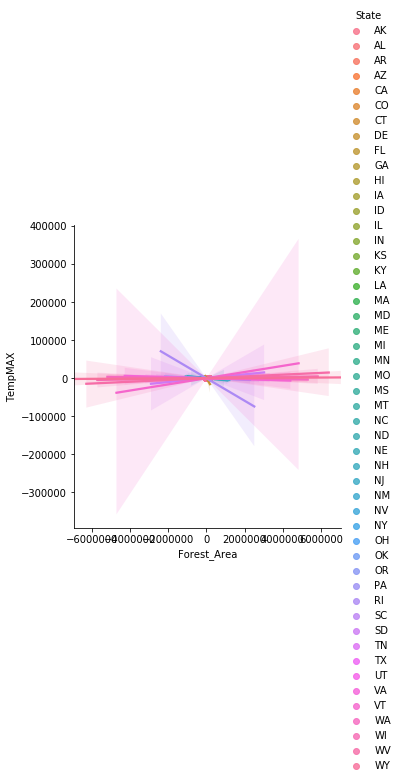

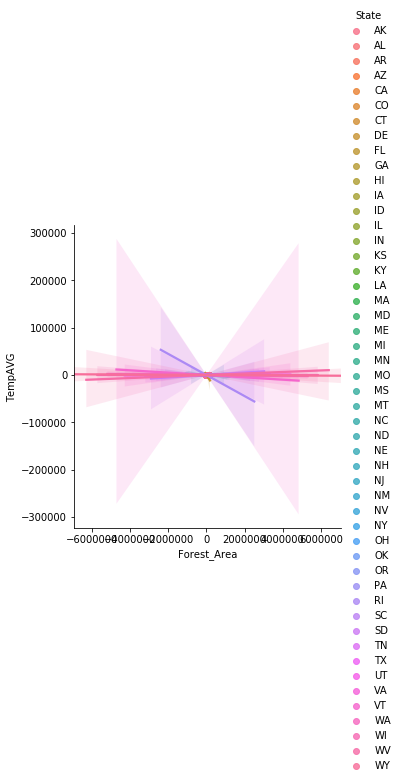

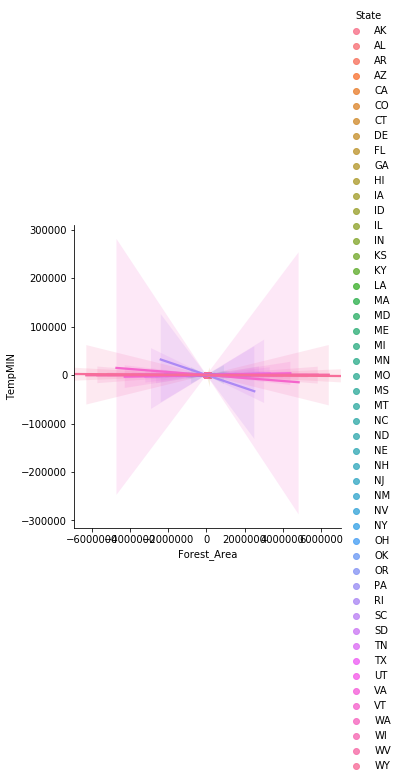

In [37]:
sns.lmplot(x='Forest_Area',y='TempMAX',data=Climate_Data[['TempMAX','Forest_Area']].dropna().reset_index().set_index('Date'),hue='State',legend=True)
sns.lmplot(x='Forest_Area',y='TempAVG',data=Climate_Data[['TempAVG','Forest_Area']].dropna().reset_index().set_index('Date'),hue='State',legend=True)
sns.lmplot(x='Forest_Area',y='TempMIN',data=Climate_Data[['TempMIN','Forest_Area']].dropna().reset_index().set_index('Date'),hue='State',legend=True)